In [5]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd

data = pd.read_csv('data.csv', engine='python', encoding='CP949')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
layer_height          50 non-null float64
wall_thickness        50 non-null int64
infill_density        50 non-null int64
infill_pattern        50 non-null object
nozzle_temperature    50 non-null int64
bed_temperature       50 non-null int64
print_speed           50 non-null int64
material              50 non-null object
fan_speed             50 non-null int64
roughness             50 non-null int64
tension_strenght      50 non-null int64
elongation            50 non-null float64
dtypes: float64(2), int64(8), object(2)
memory usage: 4.8+ KB


# Elongation

In [4]:
from statsmodels.regression.linear_model import OLS

result = smf.ols(formula = 'elongation ~ layer_height + wall_thickness + infill_density + infill_pattern + nozzle_temperature + bed_temperature + print_speed + material + fan_speed', 
                 data = data).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             elongation   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     12.88
Date:                Mon, 11 Nov 2019   Prob (F-statistic):           4.76e-09
Time:                        11:44:43   Log-Likelihood:                -27.126
No. Observations:                  50   AIC:                             72.25
Df Residuals:                      41   BIC:                             89.46
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       0.0071      0.002      3.701      0.001       0.003       0.011
infill_pattern[T.honeycomb]    -0.0623      0.136     -0.459      0.648      -0.336       0.212
material[T.pla]                -1.7837      0.702     -2.543      0.015      -3.201      -0.367
layer_height                    6.3820      1.054      6.058      0.000       4.254       8.510
wall_thickness                  0.0308      0.026      1.171      0.248      -0.022       0.084
infill_density                  0.0099      0.003      3.516      0.001       0.004       0.016
nozzle_temperature             -0.1096      0.030     -3.607      0.001      -0.171      -0.048
bed_temperature                 0.4114      0.112      3.688      0.001       0.186       0.637
print_speed                    -0.0034      0.002     -1.363      0.180      -0.008       0.002
fan_speed                      -0.0614      0.015     -4.127      0.000      -0.091      -0.031
==============================================================================
Omnibus:                        1.118   Durbin-Watson:                   1.711
Prob(Omnibus):                  0.572   Jarque-Bera (JB):                0.934
Skew:                          -0.034   Prob(JB):                        0.627
Kurtosis:                       2.334   Cond. No.                     4.97e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.29e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

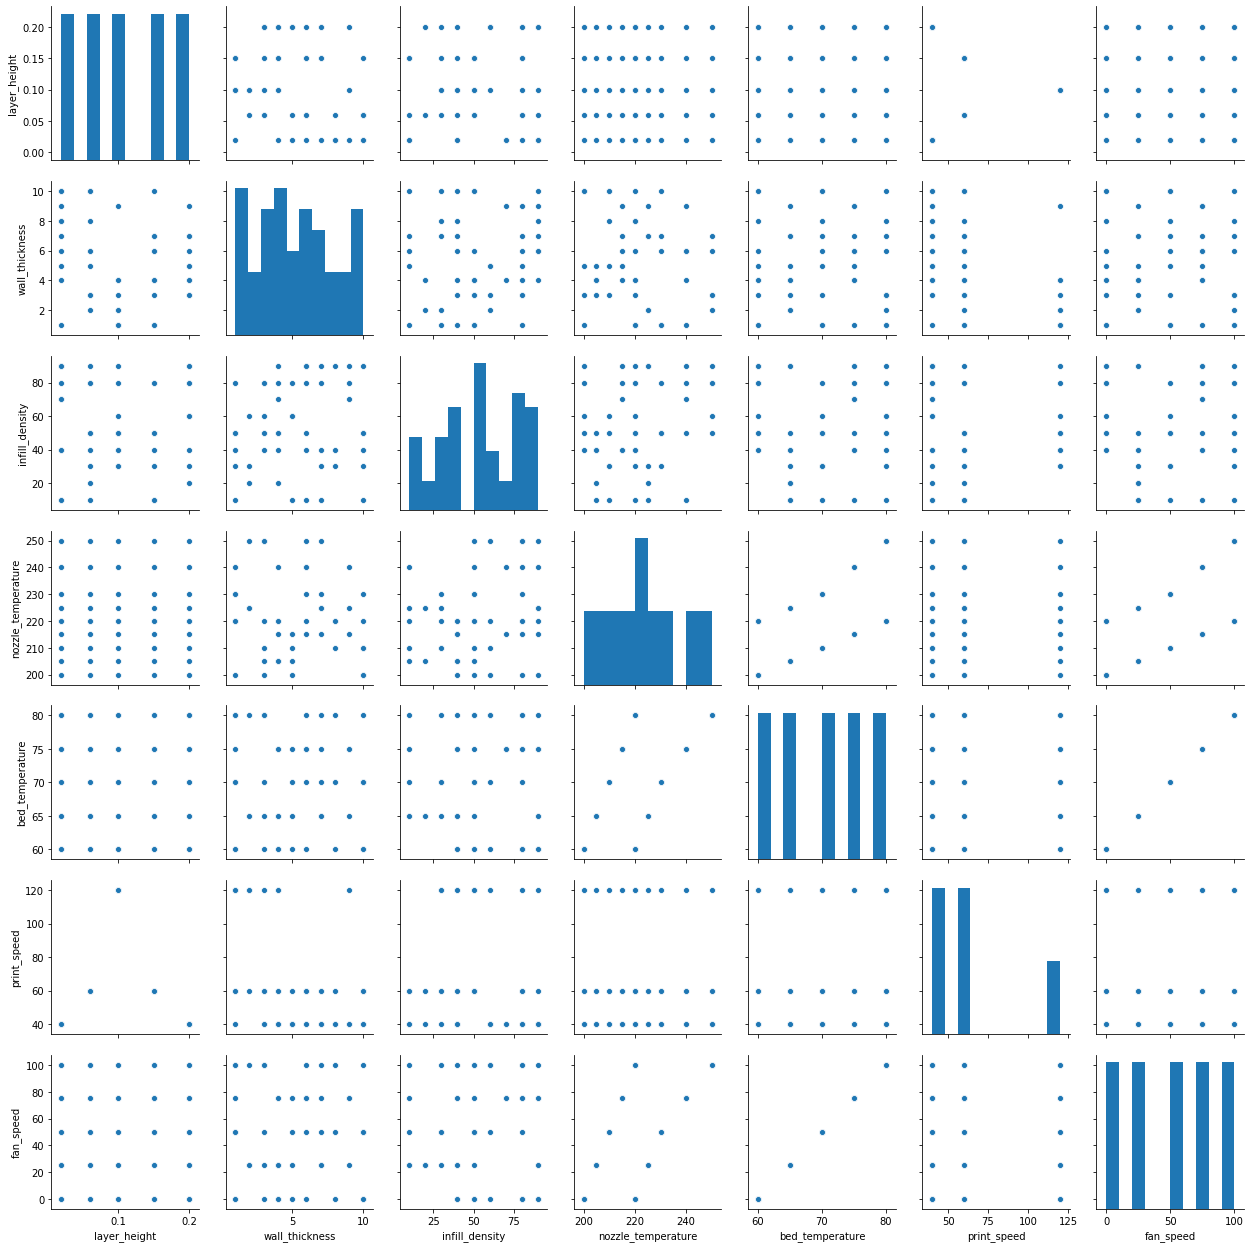

In [26]:
import seaborn as sns
from patsy import dmatrices

sns.pairplot(data[['layer_height', 'wall_thickness', 'infill_density', 'infill_pattern', 'nozzle_temperature','bed_temperature', 'print_speed', 'material', 'fan_speed']]);



In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

y, X = dmatrices('elongation ~ layer_height + wall_thickness + infill_density + infill_pattern + nozzle_temperature + bed_temperature + print_speed + material + fan_speed ', data, return_type = 'dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns 
vif

,VIF Factor,features
0,0.000000,Intercept
1,1.087509,infill_pattern[T.honeycomb]
2,29.112041,material[T.pla]
3,1.067264,layer_height
4,1.371753,wall_thickness
5,1.180552,infill_density
6,47.069693,nozzle_temperature
7,inf,bed_temperature
8,1.253881,print_speed
9,inf,fan_speed


다중 공선성 검사를 통해 10이상인 변수들 drop
- material, nozzle_temperature, bed_temperature, fan_speed

In [29]:
from statsmodels.regression.linear_model import OLS

result = smf.ols(formula = 'elongation ~ layer_height + wall_thickness + infill_density + infill_pattern + print_speed', data = data).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             elongation   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                     4.968
Date:                Sun, 10 Nov 2019   Prob (F-statistic):            0.00108
Time:                        21:38:49   Log-Likelihood:                -47.351
No. Observations:                  50   AIC:                             106.7
Df Residuals:                      44   BIC:                             118.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       0.5768      0.483      1.193      0.239      -0.397       1.551
infill_pattern[T.honeycomb]     0.0562      0.194      0.290      0.774      -0.335       0.447
layer_height                    6.6610      1.523      4.374      0.000       3.592       9.730
wall_thickness                  0.0596      0.038      1.587      0.120      -0.016       0.135
infill_density                  0.0041      0.004      1.062      0.294      -0.004       0.012
print_speed                    -0.0026      0.004     -0.732      0.468      -0.010       0.005
==============================================================================
Omnibus:                        0.872   Durbin-Watson:                   1.313
Prob(Omnibus):                  0.647   Jarque-Bera (JB):                0.947
Skew:                          -0.273   Prob(JB):                        0.623
Kurtosis:                       2.604   Cond. No.                     1.44e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

유의 확률 P>[t]를 보고, 0.05보다 작은 변수들을 유의미하다고 본다.
p>[t]가 0.05보다 큰 변수들 drop
- infill_pattern, print_speed

In [30]:
result = smf.ols(formula = 'elongation ~ layer_height + infill_density + wall_thickness ', data = data).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             elongation   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     8.336
Date:                Sun, 10 Nov 2019   Prob (F-statistic):           0.000156
Time:                        21:39:23   Log-Likelihood:                -47.687
No. Observations:                  50   AIC:                             103.4
Df Residuals:                      46   BIC:                             111.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.3507      0.322      1.090      0.281      -0.297       0.998
layer_height       6.8453      1.481      4.623      0.000       3.865       9.826
infill_density     0.0040      0.004      1.083      0.284      -0.003       0.011
wall_thickness     0.0730      0.033      2.227      0.031       0.007       0.139
==============================================================================
Omnibus:                        1.168   Durbin-Watson:                   1.333
Prob(Omnibus):                  0.558   Jarque-Bera (JB):                1.206
Skew:                          -0.307   Prob(JB):                        0.547
Kurtosis:                       2.550   Cond. No.                         955.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
result = smf.ols(formula = 'elongation ~ layer_height  + wall_thickness', data = data).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             elongation   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     11.87
Date:                Sun, 10 Nov 2019   Prob (F-statistic):           6.70e-05
Time:                        21:40:39   Log-Likelihood:                -48.317
No. Observations:                  50   AIC:                             102.6
Df Residuals:                      47   BIC:                             108.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.5416      0.270      2.008      0.050      -0.001       1.084
layer_height       6.8836      1.483      4.642      0.000       3.900       9.867
wall_thickness     0.0768      0.033      2.350      0.023       0.011       0.142
==============================================================================
Omnibus:                        0.574   Durbin-Watson:                   1.467
Prob(Omnibus):                  0.750   Jarque-Bera (JB):                0.667
Skew:                          -0.057   Prob(JB):                        0.716
Kurtosis:                       2.445   Cond. No.                         97.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
result = smf.ols(formula = 'elongation ~ layer_height + infill_density', data = data).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             elongation   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     9.246
Date:                Sun, 10 Nov 2019   Prob (F-statistic):           0.000411
Time:                        21:42:36   Log-Likelihood:                -50.246
No. Observations:                  50   AIC:                             106.5
Df Residuals:                      47   BIC:                             112.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.7533      0.277      2.718      0.009       0.196       1.311
layer_height       6.2059      1.512      4.103      0.000       3.163       9.248
infill_density     0.0049      0.004      1.272      0.209      -0.003       0.013
==============================================================================
Omnibus:                        3.101   Durbin-Watson:                   1.255
Prob(Omnibus):                  0.212   Jarque-Bera (JB):                2.427
Skew:                          -0.400   Prob(JB):                        0.297
Kurtosis:                       2.275   Cond. No.                         931.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

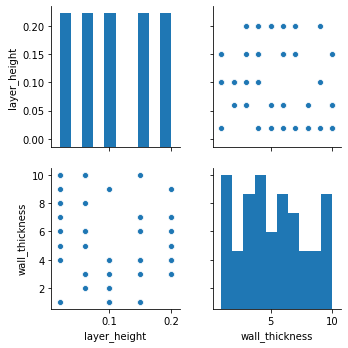

In [37]:

sns.pairplot(data[['layer_height', 'wall_thickness']]);

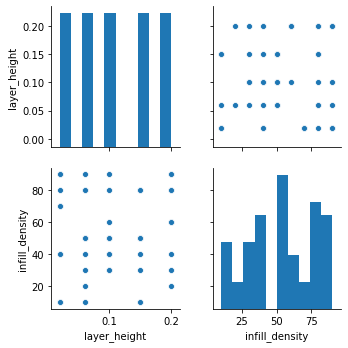

In [38]:

sns.pairplot(data[['layer_height', 'infill_density']]);

In [34]:
y, X = dmatrices('elongation ~ layer_height +  wall_thickness ', data, return_type = 'dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns 
vif

,VIF Factor,features
0,8.451307,Intercept
1,1.038512,layer_height
2,1.038512,wall_thickness


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

data_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])
imputer = SimpleImputer(strategy="median")

error = np.array(error)
error =error.reshape(-1, 1)
error = imputer.fit_transform(error)
error_std = data_pipeline.fit_transform(error)

error_std



In [ ]:
x = np.linspace(1,len(error), len(error))
pos_two = [2]*len(error)
neg_two = [-2]*len(error)

In [ ]:
plt.plot(x, error_std,'bo', x, pos_two, 'r-', x, neg_two, 'r-')
plt.grid()
#save_fig('equal_var_test.png')